<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/python-notebooks/python4QM_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 6: Python for Quantum Mechanics

## Finite square well potential:

In class, we studied the finite square well potential problem. When looking into the even solutions and applying boundary conditions, we found a transcendental equation for $z=la$:

$\tan(z) = \sqrt{\left(\frac{z_0}{z}\right)^2 - 1}$

where $a$ is the half-width of the potential $V(x)=-V_0$ between $x=-a$ and $x=+a$:

$z_0 = \frac{a}{\hbar}\sqrt{2\,m\,V_0}$,

andthe wavenumber inside the well is:

$l = \frac{\sqrt{2\,m(E+V_0)}}{\hbar}$


**Task: Solve the above transcendetal equation using python optimisation tools and display the results for several $z_0$.**

### 1. Graphical Solution:

Make plots of the two functions:

$\tan(z)$

$\sqrt{\left(\frac{z_0}{z}\right)^2 - 1}$

In [54]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Fix the value of the z_0 constant
z0 = 8

# Vector for z
z = np.arange(0., 10*np.pi, 0.001)


In [56]:
# Tangent
y_lhs = np.tan(z)

# Sqrt
y_rhs = np.sqrt((z0**2/z**2) - 1.)

/tmp/ipython-input-197324765.py:5: RuntimeWarning: divide by zero encountered in divide
  y_rhs = np.sqrt((z0**2/z**2) - 1.)
/tmp/ipython-input-197324765.py:5: RuntimeWarning: invalid value encountered in sqrt
  y_rhs = np.sqrt((z0**2/z**2) - 1.)


In [57]:
# Remove the large values from the tangent
y_lhs[y_lhs > +4*z0] = np.nan # nan -> not a number
y_lhs[y_lhs < -4*z0] = np.nan

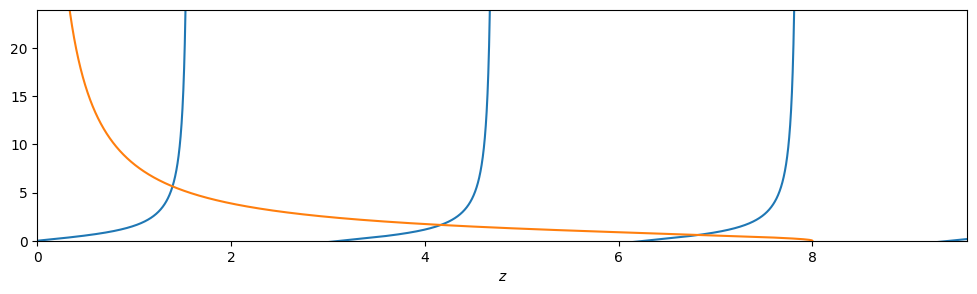

In [58]:
# Plotting

plt.figure(figsize=(12, 3))

plt.plot(z, y_lhs)
plt.plot(z, y_rhs)

plt.xlabel(r"$z$")

plt.xlim(0, 1.2*z0)
plt.ylim(0, 3*z0)

plt.show()

### 2. Numerical Solution:

We need to create a functional:

$\tan(z) = \sqrt{\left(\frac{z_0}{z}\right)^2 - 1}$

Next step:

$\frac{\tan(z)}{\sqrt{\left(\frac{z_0}{z}\right)^2 - 1}} = 1$


$G(z)=\frac{\tan(z)}{\sqrt{\left(\frac{z_0}{z}\right)^2 - 1}} -1 = 0$

We have turned our problem into an optimisation problem.


In [59]:
# Objective function

def obj_func(z, z0):
  """
  Objective function.
  """
  # Function itself
  opt_func = np.tan(z)/(np.sqrt((z0**2/z**2)-1.))-1.

  return opt_func

In [60]:
# Optimisation routines

import scipy.optimize as opt

In [61]:
# Optimisation step: We find to find the z value for which G(z)=0

result = opt.root(obj_func, [1., 4., 7.], args = z0)

In [62]:
# Display the solution

print(result.x)

[1.39546614 4.16483091 6.83067433]


In [63]:
# Evaluate these points
y0 = np.tan(result.x[0])
y1 = np.tan(result.x[1])
y2 = np.tan(result.x[2])

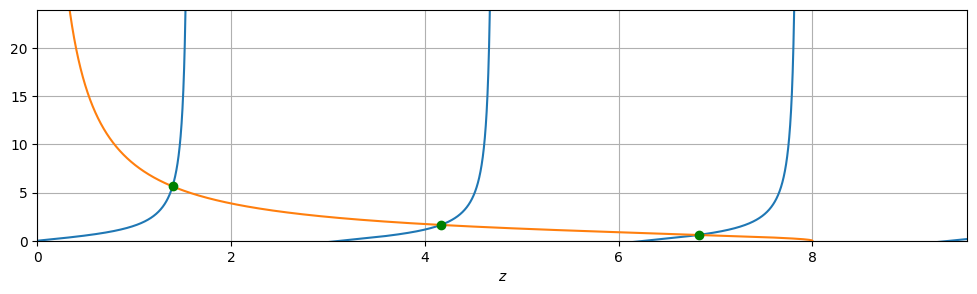

In [64]:
# Plotting

plt.figure(figsize=(12, 3))

plt.plot(z, y_lhs)
plt.plot(z, y_rhs)

plt.xlabel(r"$z$")

# Solutions
plt.plot(result.x[0], y0, marker = "o", c = "green")
plt.plot(result.x[1], y1, marker = "o", c = "green")
plt.plot(result.x[2], y2, marker = "o", c = "green")

plt.xlim(0, 1.2*z0)
plt.ylim(0, 3*z0)
plt.grid()
plt.show()